# Dark Matter Freeze Out

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.special import zeta
from astropy import units as u
from sympy.solvers import solve
from sympy import Symbol
import csv
from scipy.optimize import fsolve
%matplotlib inline

In [34]:
sigma=1
Mp=2.4e27
g=2
gstar=10.75
T_fo=1e6
T_0=0.2348e-3
a_fo=T_0/T_fo
grams_to_eV=5.6095883571872e+32
cm_m1_to_eV=0.00012
crit_density=1.9e-29*(grams_to_eV)*(cm_m1_to_eV**3)

def hubble(T):
    return (np.pi/3)*(gstar/10)**(1/2)*((T)**2/Mp)

def density_rel(T,ferm=True):
    if ferm:
        return (zeta(3)/np.pi**2)*g*(7/8)*T**3
    else:
        return (zeta(3)/np.pi**2)*g*T**3

def density_non_rel(T,m):
    return g((m*T)/(2*np.pi))**(3/2)*np.exp(-m/T)

def abundance_rel(density,m):
    return (density*m)/(crit_abundance)

def scaling(density, a):
    return density/a**3

def present_abund(m_DM,sigma):
    density=hubble(T_fo)/sigma
    return scaling(density,a_fo)*m_DM/crit_density

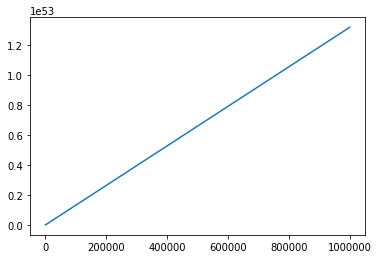

In [37]:
m_array=np.linspace(1e3,1e6,50)
sigma=10**-18*(cm_m1_to_eV**2)
plt.plot(m_array, present_abund(m_array,sigma))
plt.show()

## Let us think about $g_{*S}$

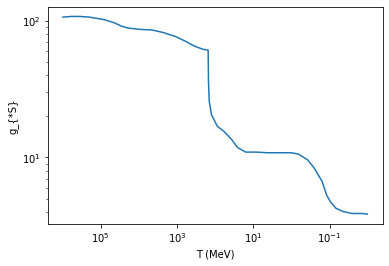

In [16]:
gstar_data = np.genfromtxt('gstar.csv', delimiter=',')
plt.plot(gstar_data[:,0],gstar_data[:,1])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('g_{*S}')
plt.xlabel('T (MeV)')
plt.gca().invert_xaxis()
plt.show()

def gstar(T):
    return np.interp(T,gstar_data[:,0], gstar_data[:,1])

## Converting between $a$ and $T$:

$$a^3g_{*S}(T)T^3=\text{const}$$

In [15]:
from scipy.optimize import fsolve


T_0 = 2

def T_to_a(T):
    return (gstar(T_0)/gstar(T))**(1/3)*(T_0/T)
def a_to_T(a):
    func = lambda T: a**3*(gstar(T))*T**3-gstar(T_0)*T_0**3
    T_initial_guess = gstar(T_0)**(1/3)*(T_0/a)
    T_solution = fsolve(func, T_initial_guess)
    return T_solution

a_test = T_to_a(100)
a_to_T(a_test)

array([100.])